In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Population_Data.csv')
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
Region                38 non-null object
Office Location Id    38 non-null int64
Indians               38 non-null object
Foreigners            38 non-null object
Indian_Male           38 non-null object
Indian_Female         38 non-null object
Foreigners_Male       38 non-null object
Foreigners_Female     38 non-null object
Total Population      38 non-null object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [4]:
df.columns

Index(['Region', 'Office Location Id', 'Indians', 'Foreigners', 'Indian_Male',
       'Indian_Female', 'Foreigners_Male', 'Foreigners_Female',
       'Total Population'],
      dtype='object')

In [5]:
num=['Indians', 'Foreigners', 'Indian_Male',
       'Indian_Female', 'Foreigners_Male', 'Foreigners_Female',
       'Total Population']

In [6]:
def cleaner(x):
    return x.replace(',','')

In [7]:
for i in df[num]:
    df[i]=df[i].apply(cleaner)

In [8]:
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [9]:
df[num]=df[num].apply(pd.to_numeric)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
Region                38 non-null object
Office Location Id    38 non-null int64
Indians               38 non-null int64
Foreigners            38 non-null int64
Indian_Male           38 non-null int64
Indian_Female         38 non-null int64
Foreigners_Male       38 non-null int64
Foreigners_Female     38 non-null int64
Total Population      38 non-null int64
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [11]:
#check integrity of data
df[['Indians','Foreigners']].sum().sum()-df['Total Population'].sum()

0

In [12]:
df[['Indian_Male','Indian_Female', 'Foreigners_Male', 'Foreigners_Female',]].sum().sum()-df['Total Population'].sum()

-112859

In [13]:
sum=df['Indian_Male']+df['Indian_Female']+df['Foreigners_Male']+df['Foreigners_Female']
df['other']=df['Total Population']-sum

In [14]:
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [15]:
df['Region'].nunique(),df['Office Location Id'].nunique()

(38, 38)

In [16]:
df1=df.drop(columns=['Region', 'Office Location Id','Total Population'])

In [17]:
df1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


In [18]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns =df1.columns
df1=norm.fit_transform(df1)

In [20]:
df1=pd.DataFrame(data=df1,columns=columns)
df1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


## Implement K means Algo

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =2)
kmeans.fit(df1)
pred =kmeans.predict(df1)

In [24]:
pred,len(pred)

(array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), 38)

In [25]:
#evaluation Metrics
kmeans.inertia_

0.028113285898827122

In [29]:
##Calculate the no. of clusters
SSE=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)

In [31]:
frame =pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})

Text(0, 0.5, 'Inertia')

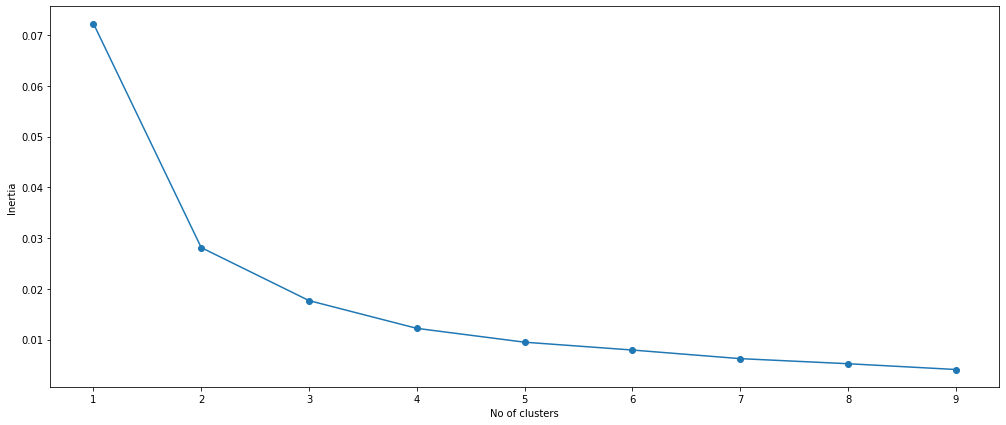

In [33]:
plt.figure(figsize=(17,7))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")

#### here ideal no of clusters can be 3/4/5 because there is very less drop in values after 3. So we take Clusters as 3

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =3)
kmeans.fit(df1)
pred =kmeans.predict(df1)

In [35]:
kmeans.inertia_

0.017667306467932346